In [2]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [3]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 16146, done.
remote: Counting objects: 100% (776/776), done.
remote: Compressing objects: 100% (516/516), done.
remote: Total 16146 (delta 489), reused 411 (delta 258), pack-reused 15370
Receiving objects: 100% (16146/16146), 8.74 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (11119/11119), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 10.3 MB/s eta 0:00:00


In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout
from PIL import Image

In [6]:
from ultralytics import YOLO

In [7]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
# Train the model
results = model.train(data='/content/drive/MyDrive/plate_detection/data.yaml', epochs=100, imgsz=832)

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/plate_detection/data.yaml, epochs=100, patience=50, batch=16, imgsz=820, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
results = model.predict('/content/drive/MyDrive/plate_detection/TEST/TEST.jpeg', save=True)


image 1/1 /content/drive/MyDrive/plate_detection/TEST/TEST.jpeg: 704x832 1 number_plate, 96.1ms
Speed: 5.8ms preprocess, 96.1ms inference, 2.4ms postprocess per image at shape (1, 3, 704, 832)
Results saved to runs/detect/predict


In [ ]:
result2 = model.predict('/content/Image2.jpeg',save=True)


image 1/1 /content/Image2.jpeg: 640x832 1 number_plate, 10.8ms
Speed: 5.1ms preprocess, 10.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 832)
Results saved to runs/detect/predict2


In [ ]:
result3 = model.predict('/content/Image3.jpeg',save=True)


image 1/1 /content/Image3.jpeg: 832x640 1 number_plate, 88.1ms
Speed: 6.1ms preprocess, 88.1ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict3


In [ ]:
model.export(format='onnx')

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 832, 832) BCHW and output shape(s) (1, 5, 14196) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 163.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 11.5s, saved as 'runs/detect/train/weights/best.onnx' (11.8 MB)

Export complete (13.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=832  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=832 data=/content/drive/MyDrive/plate_detect

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs/detect/train/weights/best.onnx'

### Model-2 (200 epochs)

In [ ]:
model2 = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
# Train the model
results2 = model2.train(data='/content/drive/MyDrive/plate_detection/data.yaml', epochs=150, imgsz=832)

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/plate_detection/data.yaml, epochs=150, patience=50, batch=16, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
pred1 = model2.predict('/content/Car2.jpeg',save=True)


image 1/1 /content/Car2.jpeg: 832x640 1 number_plate, 212.8ms
Speed: 13.2ms preprocess, 212.8ms inference, 2.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict


In [ ]:
pred2 = model2.predict('/content/Car4.jpg',save=True)


image 1/1 /content/Car4.jpg: 832x640 1 number_plate, 29.9ms
Speed: 5.9ms preprocess, 29.9ms inference, 3.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict2


In [ ]:
pred2 = model2.predict('/content/Car8.jpeg',save=True)


image 1/1 /content/Car8.jpeg: 640x832 2 number_plates, 92.6ms
Speed: 5.4ms preprocess, 92.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 832)
Results saved to runs/detect/predict3


In [ ]:
model2.export(format='onnx')

Ultralytics YOLOv8.0.176 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 832, 832) BCHW and output shape(s) (1, 5, 14196) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 45.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 9.1s, saved as 'runs/detect/train/weights/best.onnx' (11.8 MB)

Export complete (11.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=832  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=832 data=/content/drive/MyDrive/plate_detectio

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs/detect/train/weights/best.onnx'

## Model with lower Image size

In [ ]:
result3 = model.train(data='/content/drive/MyDrive/plate_detection/data.yaml', epochs=100, imgsz=512)

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/plate_detection/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
pred1 = model.predict('/content/car-0-Car_image.jpeg',save=True)


image 1/1 /content/car-0-Car_image.jpeg: 448x512 1 number_plate, 77.4ms
Speed: 1.9ms preprocess, 77.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 512)
Results saved to runs/detect/predict9


## Inference

In [ ]:
import torch
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
im1 = Image.open('/content/Car4.jpg')
im2 = Image.open('/content/Car6.jpg')
im3 = Image.open('/content/Car8.jpeg')

In [ ]:
result3 = model([im1,im3])


0: 832x832 1 number_plate, 1: 832x832 3 number_plates, 519.3ms
Speed: 26.6ms preprocess, 259.6ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 832)


In [ ]:
result3

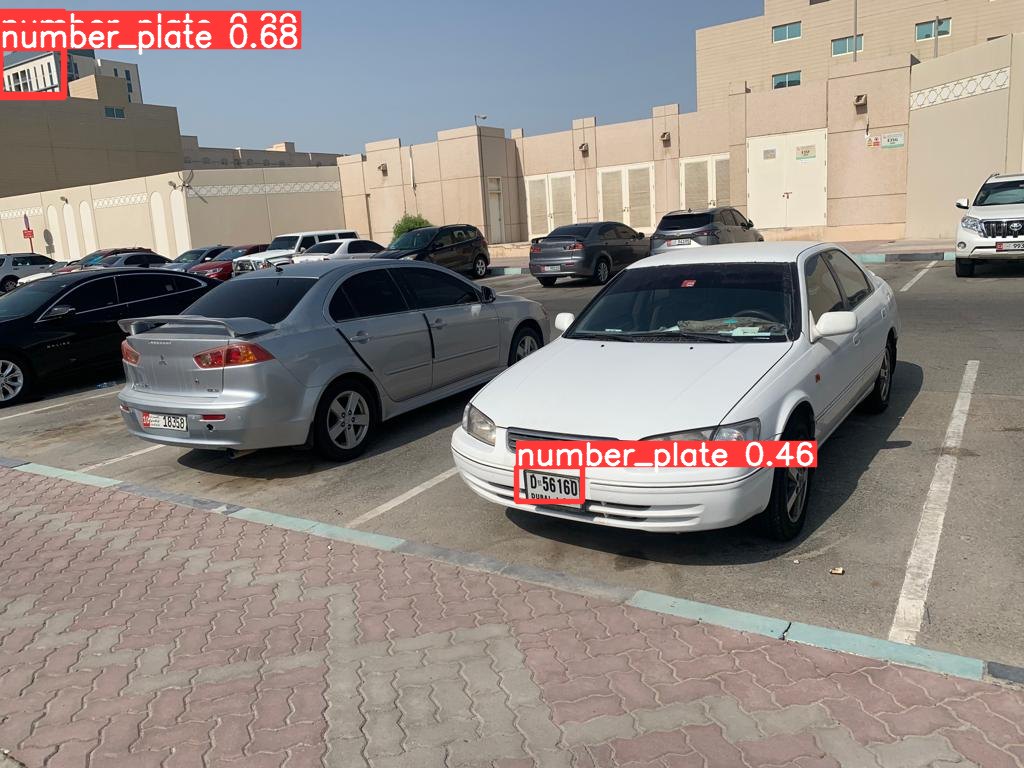

In [ ]:
res_plotted = result3[1].plot()
cv2_imshow(res_plotted)

In [ ]:
result3

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'number_plate'}
 orig_img: array([[[ 34,  47,  39],
         [ 42,  57,  49],
         [ 41,  62,  53],
         ...,
         [161, 191, 210],
         [163, 193, 212],
         [164, 194, 213]],
 
        [[ 31,  44,  36],
         [ 37,  52,  44],
         [ 42,  63,  54],
         ...,
         [169, 199, 218],
         [172, 202, 221],
         [174, 204, 223]],
 
        [[ 33,  48,  40],
         [ 27,  44,  35],
         [ 28,  49,  40],
         ...,
         [161, 191, 210],
         [158, 188, 207],
         [157, 187, 206]],
 
        ...,
 
        [[148, 154, 177],
         [146, 152, 175],
         [145, 151, 174],
         ...,
         [152, 160, 183],
         [153, 159, 182],
         [161, 167, 190]],
 
        [[140, 146, 169],
         [139, 145, 168],
         [142, 148, 171],
         ...,
         [154, 162, 185

In [ ]:
import os

In [ ]:
os.listdir('/content/runs/detect/predict')

['Car2.jpeg']

In [ ]:
result3[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[605.7322, 414.8904, 734.5157, 486.8939,   0.8958,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.8958], device='cuda:0')
data: tensor([[605.7322, 414.8904, 734.5157, 486.8939,   0.8958,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1024, 768)
shape: torch.Size([1, 6])
xywh: tensor([[670.1240, 450.8922, 128.7835,  72.0034]], device='cuda:0')
xywhn: tensor([[0.8726, 0.4403, 0.1677, 0.0703]], device='cuda:0')
xyxy: tensor([[605.7322, 414.8904, 734.5157, 486.8939]], device='cuda:0')
xyxyn: tensor([[0.7887, 0.4052, 0.9564, 0.4755]], device='cuda:0')

In [ ]:
result3[0].boxes.xywh

tensor([[670.1240, 450.8922, 128.7835,  72.0034]], device='cuda:0')

In [ ]:
bounding_box_cods = result3[0].boxes.xywh

In [ ]:
bounding_box_cods[0].cpu().numpy()

array([     670.12,      450.89,      128.78,      72.003], dtype=float32)

In [ ]:
import cv2
imag = cv2.imread('/content/Car4.jpg')
roi = imag[414:486,605:734]

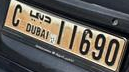

In [ ]:
cv2_imshow(roi)

In [ ]:
im4 = Image.open('/content/Car_image.jpeg')
model = YOLO('/content/runs/detect/train/weights/best.pt')
result5 = model([im4])


0: 640x832 (no detections), 12.6ms
Speed: 4.1ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 832)


## Training with the new dataset

In [8]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Sep 22 06:45 kaggle.json


In [9]:
!pip install -q kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d rajeevnair676/yolo-license-roboflow

100% 2.08G/2.08G [00:20<00:00, 49.4MB/s]
100% 2.08G/2.08G [00:20<00:00, 109MB/s] 


In [14]:
!unzip yolo-license-roboflow.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/images/1-150_png.rf.816b3f2143c5b98d08f0c522802a378a.jpg  
  inflating: valid/images/1-17106_jpg.rf.482dae75fba50b2f3efb3ce2f543e7d2.jpg  
  inflating: valid/images/1-19414_jpg.rf.4e33a4ecca6374cb017f859146061b7e.jpg  
  inflating: valid/images/1-1_jpg.rf.0fa9958069f8b7c977714d58d2c737f3.jpg  
  inflating: valid/images/1-21940_jpg.rf.50f48e56836645cb6e985f2a71eb3f11.jpg  
  inflating: valid/images/1-237_png.rf.0149e8e437e81025c2a8246d0be91cdf.jpg  
  inflating: valid/images/1-23819_jpg.rf.a45afccdf3cf73ced4f57f9692fee3c4.jpg  
  inflating: valid/images/1-249_png.rf.ffd4bac13b3ae576fc839407b5a7ec46.jpg  
  inflating: valid/images/1-2587_png.rf.f54e08aa66ca6747a81b66bad52e312b.jpg  
  inflating: valid/images/1-313_png.rf.a920e56a0a6a72e0c668cdb28ce4b89c.jpg  
  inflating: valid/images/1-328_png.rf.85d18d0b3c2e32a158c1770dbf76ed05.jpg  
  inflating: valid/images/1-4096_png.rf.c767827b22aeec86f5d000b24503ee0f.jpg  
  inf

In [15]:
results = model.train(data='/content/data.yaml', epochs=10, imgsz=820)

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data.yaml, epochs=10, patience=50, batch=16, imgsz=820, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [16]:
preds = model.predict('/content/car-1-Car8.jpeg',save=True)


image 1/1 /content/car-1-Car8.jpeg: 416x832 1 1, 1 3, 3 5s, 1 8, 1 9, 2 old_abudabis, 1 plate, 286.0ms
Speed: 11.9ms preprocess, 286.0ms inference, 5.9ms postprocess per image at shape (1, 3, 416, 832)
Results saved to runs/detect/predict


In [21]:
preds[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[ 55.5290, 158.4195,  61.9008, 170.3771,   0.8924,   5.0000],
        [ 20.9014, 149.1413,  73.8028, 176.9844,   0.8805,  50.0000],
        [ 58.9190, 158.9382,  64.4943, 170.7730,   0.8429,   5.0000],
        [ 31.5213, 159.8995,  45.0772, 167.3358,   0.8229,  45.0000],
        [ 50.5508, 157.6040,  56.6213, 169.5523,   0.7796,   3.0000],
        [ 45.4934, 157.2707,  51.7706, 169.2141,   0.7541,   1.0000],
        [ 50.5092, 157.5261,  56.6800, 169.7282,   0.7518,   8.0000],
        [ 62.9602, 158.7738,  69.3329, 171.2164,   0.6491,   9.0000],
        [ 29.6880, 158.1109,  44.9532, 168.3807,   0.5345,  45.0000],
        [ 56.3393, 158.7263,  64.2924, 170.7199,   0.4206,   5.0000]], device='cuda:0')
cls: tensor([ 5., 50.,  5., 45.,  3.,  1.,  8.,  9., 45.,  5.], device='cuda:0')
conf: tensor([0.8924, 0.8805, 0.8429, 0.8229, 0.7796, 0.7541, 0.7518, 0.6491, 0.5345, 0.4206], device='cuda:0')
data: tensor([[ 55.5290,

In [22]:
preds2 = model.predict('/content/car-0-Car_image.jpeg',save=True)


image 1/1 /content/car-0-Car_image.jpeg: 736x832 1 0, 1 1, 1 2, 1 3, 2 5s, 1 6, 1 9, 1 plate, 111.4ms
Speed: 9.0ms preprocess, 111.4ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 832)
Results saved to runs/detect/predict2


In [23]:
preds2[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[114.6899, 148.5244, 120.9642, 159.2318,   0.9838,   6.0000],
        [121.3335, 148.5783, 127.9438, 159.2323,   0.9771,   9.0000],
        [107.3017, 148.5552, 114.1349, 159.4432,   0.9276,   3.0000],
        [ 71.9421, 141.1655, 147.3893, 165.7368,   0.8753,  50.0000],
        [128.1584, 148.1962, 134.9588, 158.9311,   0.8169,   2.0000],
        [ 76.4809, 149.9402,  81.9927, 158.9099,   0.8083,   5.0000],
        [135.3206, 147.9025, 141.6497, 158.9529,   0.5375,   1.0000],
        [107.2362, 148.5759, 114.1130, 159.2965,   0.3453,   5.0000],
        [ 81.1698, 150.0363,  86.9944, 159.5640,   0.2677,   0.0000]], device='cuda:0')
cls: tensor([ 6.,  9.,  3., 50.,  2.,  5.,  1.,  5.,  0.], device='cuda:0')
conf: tensor([0.9838, 0.9771, 0.9276, 0.8753, 0.8169, 0.8083, 0.5375, 0.3453, 0.2677], device='cuda:0')
data: tensor([[114.6899, 148.5244, 120.9642, 159.2318,   0.9838,   6.0000],
        [121.3335, 148.5783, 12

In [24]:
preds2

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'exp', 37: 'new_DUBAI', 38: 'new_RAK', 39: 'new_abudabi', 40: 'new_ajman', 41: 'new_am', 42: 'new_fujairah', 43: 'old_DUBAI', 44: 'old_RAK', 45: 'old_abudabi', 46: 'old_ajman', 47: 'old_am', 48: 'old_fujira', 49: 'old_sharka', 50: 'plate'}
 orig_img: array([[[167, 172, 181],
         [167, 172, 181],
         [167, 172, 181],
         ...,
         [ 47,  60,  68],
         [ 54,  67,  75],
         [ 58,  74,  81]],
 
        [[170, 175, 184],
         [170, 175, 184],
         [170, 175, 184],
         ...,
         [ 37,  50

In [25]:
preds3 = model.predict('/content/Car14.jpeg',save=True)


image 1/1 /content/Car14.jpeg: 832x640 2 plates, 308.2ms
Speed: 15.9ms preprocess, 308.2ms inference, 7.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict3


In [26]:
preds4 = model.predict('/content/Car15.jpeg',save=True)


image 1/1 /content/Car15.jpeg: 832x640 3 plates, 27.8ms
Speed: 20.5ms preprocess, 27.8ms inference, 19.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict4


In [27]:
preds5 = model.predict('/content/Cars_test.jpg',save=True)


image 1/1 /content/Cars_test.jpg: 640x832 1 0, 1 1, 1 4, 1 9, 1 plate, 147.2ms
Speed: 10.3ms preprocess, 147.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 832)
Results saved to runs/detect/predict5


In [28]:
preds5[0].boxes.xyxy

tensor([[204.0130, 553.7150, 271.7911, 576.6022],
        [254.0146, 559.4426, 260.5775, 571.4091],
        [247.8496, 559.3103, 254.1002, 571.4561],
        [241.0477, 558.6949, 246.5527, 571.1921],
        [261.0785, 559.6124, 267.8476, 571.3769]], device='cuda:0')

In [29]:
preds5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'exp', 37: 'new_DUBAI', 38: 'new_RAK', 39: 'new_abudabi', 40: 'new_ajman', 41: 'new_am', 42: 'new_fujairah', 43: 'old_DUBAI', 44: 'old_RAK', 45: 'old_abudabi', 46: 'old_ajman', 47: 'old_am', 48: 'old_fujira', 49: 'old_sharka', 50: 'plate'}
 orig_img: array([[[197, 203, 180],
         [197, 203, 180],
         [195, 203, 180],
         ...,
         [194, 204, 181],
         [193, 203, 180],
         [192, 202, 179]],
 
        [[198, 204, 181],
         [198, 204, 181],
         [196, 204, 181],
         ...,
         [194, 204

In [30]:
preds5[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[2.0401e+02, 5.5371e+02, 2.7179e+02, 5.7660e+02, 8.4529e-01, 5.0000e+01],
        [2.5401e+02, 5.5944e+02, 2.6058e+02, 5.7141e+02, 7.0409e-01, 0.0000e+00],
        [2.4785e+02, 5.5931e+02, 2.5410e+02, 5.7146e+02, 6.2521e-01, 4.0000e+00],
        [2.4105e+02, 5.5869e+02, 2.4655e+02, 5.7119e+02, 4.9717e-01, 1.0000e+00],
        [2.6108e+02, 5.5961e+02, 2.6785e+02, 5.7138e+02, 4.2531e-01, 9.0000e+00]], device='cuda:0')
cls: tensor([50.,  0.,  4.,  1.,  9.], device='cuda:0')
conf: tensor([0.8453, 0.7041, 0.6252, 0.4972, 0.4253], device='cuda:0')
data: tensor([[2.0401e+02, 5.5371e+02, 2.7179e+02, 5.7660e+02, 8.4529e-01, 5.0000e+01],
        [2.5401e+02, 5.5944e+02, 2.6058e+02, 5.7141e+02, 7.0409e-01, 0.0000e+00],
        [2.4785e+02, 5.5931e+02, 2.5410e+02, 5.7146e+02, 6.2521e-01, 4.0000e+00],
        [2.4105e+02, 5.5869e+02, 2.4655e+02, 5.7119e+02, 4.9717e-01, 1.0000e+00],
        [2.6108e+02, 5.5961e+02, 2.6785e+02, 

In [31]:
preds6 = model.predict('/content/Car11.jpg',save=True)


image 1/1 /content/Car11.jpg: 832x640 1 plate, 47.3ms
Speed: 17.9ms preprocess, 47.3ms inference, 5.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict6


In [32]:
preds7 = model.predict('/content/Truck1.jpg',save=True)


image 1/1 /content/Truck1.jpg: 832x640 1 plate, 16.7ms
Speed: 12.8ms preprocess, 16.7ms inference, 2.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/predict7
